In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Merged_ Cost_Report.csv')

## Check for basic info of the dataset

In [ ]:
print("\n=== BASIC DATASET INFORMATION ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


=== BASIC DATASET INFORMATION ===
Dataset shape: (86117, 13)

First 5 rows:
   rpt_rec_num  Provider_CCN  Total_Days_Total  Number_of_Beds  \
0      1089712        495134            6720.0           120.0   
1      1091410         75417            8097.0           114.0   
2      1093283        165252            3575.0            60.0   
3      1095547        225497            6113.0           141.0   
4      1095966        265161            4734.0           172.0   

   Total_Bed_Days_Available  Total_Assets  Total_current_liabilities  \
0                    7320.0      765020.0                   453591.0   
1                    8550.0     1687456.0                  2765768.0   
2                    5520.0      244239.0                   192098.0   
3                    8601.0     1830758.0                  1824376.0   
4                    5332.0      807209.0                   808822.0   

   Total_liabilities  Inpatient_Revenue  Net_Patient_Revenue  Net_Income  \
0           45359

## Check for basic info of the dataset

In [ ]:
print("\n=== BASIC DATASET INFORMATION ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\n=== COLUMN INFORMATION ===")
print(df.info())

print("\n=== SUMMARY STATISTICS ===")
print(df.describe())



=== BASIC DATASET INFORMATION ===
Dataset shape: (86117, 13)

First 5 rows:
   rpt_rec_num  Provider_CCN  Total_Days_Total  Number_of_Beds  \
0      1089712        495134            6720.0           120.0   
1      1091410         75417            8097.0           114.0   
2      1093283        165252            3575.0            60.0   
3      1095547        225497            6113.0           141.0   
4      1095966        265161            4734.0           172.0   

   Total_Bed_Days_Available  Total_Assets  Total_current_liabilities  \
0                    7320.0      765020.0                   453591.0   
1                    8550.0     1687456.0                  2765768.0   
2                    5520.0      244239.0                   192098.0   
3                    8601.0     1830758.0                  1824376.0   
4                    5332.0      807209.0                   808822.0   

   Total_liabilities  Inpatient_Revenue  Net_Patient_Revenue  Net_Income  \
0           45359

In [27]:
if 'Hospital_Size_Category' not in df.columns and 'Number_of_Beds' in df.columns:
    # Create hospital size categories if they don't exist
    bins = [0, 25, 50, 100, 200, 500, float('inf')]
    labels = ['Very Small (<25)', 'Small (25-49)', 'Medium (50-99)',
              'Large (100-199)', 'Very Large (200-499)', 'Mega (500+)']
    df['Hospital_Size_Category'] = pd.cut(df['Number_of_Beds'], bins=bins, labels=labels)

## Check for the missing values


In [ ]:
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0])


=== MISSING VALUES ===
                           Missing Values  Percentage
Total_Days_Total                     1186    1.377196
Number_of_Beds                       1363    1.582730
Total_Bed_Days_Available             1384    1.607116
Total_Assets                         1594    1.850970
Total_current_liabilities            1797    2.086696
Total_liabilities                    1751    2.033280
Inpatient_Revenue                    1314    1.525831
Net_Patient_Revenue                  1304    1.514219
Net_Income                           1306    1.516541
Total_Income                         1294    1.502607
report_year                             2    0.002322


## Checking for duplicate values

In [3]:
print("\n=== CHECKING FOR DUPLICATES ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


=== CHECKING FOR DUPLICATES ===
Number of duplicate rows: 558


## Data Cleanig Process

In [6]:
original_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {original_rows - len(df)} duplicate rows")
print("\nHandling missing values...")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"  - Filled {missing_count} missing values in {col} with median ({median_val})")

Removed 558 duplicate rows

Handling missing values...
  - Filled 1173 missing values in Total_Days_Total with median (29599.0)
  - Filled 1352 missing values in Number_of_Beds with median (109.0)
  - Filled 1370 missing values in Total_Bed_Days_Available with median (37595.0)
  - Filled 1582 missing values in Total_Assets with median (3160497.0)
  - Filled 1784 missing values in Total_current_liabilities with median (1161285.0)
  - Filled 1737 missing values in Total_liabilities with median (2057056.5)
  - Filled 1303 missing values in Inpatient_Revenue with median (9775631.0)
  - Filled 1295 missing values in Net_Patient_Revenue with median (7959153.0)
  - Filled 1298 missing values in Net_Income with median (40850.0)
  - Filled 1282 missing values in Total_Income with median (53308.0)
  - Filled 2 missing values in report_year with median (2018.0)


## Fill the Missing Values


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"  - Filled {missing_count} missing values in {col} with mode ({mode_val})")


Fixing data types...


## Convert Financial Values to Numeric Values

In [9]:
financial_cols = [
    'Total_Assets', 'Total_current_liabilities', 'Total_liabilities',
    'Inpatient_Revenue', 'Net_Patient_Revenue', 'Net_Income', 'Total_Income'
]
financial_cols = [col for col in financial_cols if col in df.columns]

for col in financial_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"  - Converted {col} to numeric type")

# Ensure Provider_CCN is formatted consistently
if 'Provider_CCN' in df.columns:
    df['Provider_CCN'] = df['Provider_CCN'].astype(str).str.zfill(6)
    print("  - Standardized Provider_CCN format")

  - Converted Total_Assets to numeric type
  - Converted Total_current_liabilities to numeric type
  - Converted Total_liabilities to numeric type
  - Converted Inpatient_Revenue to numeric type
  - Converted Net_Patient_Revenue to numeric type
  - Converted Net_Income to numeric type
  - Converted Total_Income to numeric type
  - Standardized Provider_CCN format


## Ensuring Data is Formatted Correctly

In [10]:
if 'Provider_CCN' in df.columns:
    df['Provider_CCN'] = df['Provider_CCN'].astype(str).str.zfill(6)
    print("  - Standardized Provider_CCN format")
if 'report_year' in df.columns:
    df['report_year'] = pd.to_numeric(df['report_year'], errors='coerce').astype('Int64')
    print("  - Converted report_year to integer type")

  - Standardized Provider_CCN format
  - Converted report_year to integer type


## Handling Outliers

In [11]:
print("\nHandling outliers in financial columns...")
for col in financial_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    if outliers > 0:
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"  - Capped {outliers} outliers in {col}")


Handling outliers in financial columns...
  - Capped 11758 outliers in Total_Assets
  - Capped 11280 outliers in Total_current_liabilities
  - Capped 12444 outliers in Total_liabilities
  - Capped 4089 outliers in Inpatient_Revenue
  - Capped 3994 outliers in Net_Patient_Revenue
  - Capped 9291 outliers in Net_Income
  - Capped 9290 outliers in Total_Income


## Occupancy Rate

In [12]:
if all(col in df.columns for col in ['Total_Days_Total', 'Total_Bed_Days_Available']):
    df['Occupancy_Rate'] = df['Total_Days_Total'] / df['Total_Bed_Days_Available']
    df['Occupancy_Rate'] = df['Occupancy_Rate'].clip(0, 1)  # Ensure rate is between 0 and 1
    print("  - Created Occupancy_Rate")

  - Created Occupancy_Rate


## Profit Margin

In [13]:
if all(col in df.columns for col in ['Net_Income', 'Net_Patient_Revenue']):
    df['Profit_Margin'] = df['Net_Income'] / df['Net_Patient_Revenue']
    print("  - Created Profit_Margin")

  - Created Profit_Margin


## Check for Other Issues

In [14]:
print("\nFinal data quality check:")
print(f"  - Final dataset shape: {df.shape}")
print(f"  - Remaining missing values: {df.isnull().sum().sum()}")


Final data quality check:
  - Final dataset shape: (85559, 15)
  - Remaining missing values: 0


In [15]:
print("\n=== SUMMARY OF CLEANED DATA ===")
print(df.describe())


=== SUMMARY OF CLEANED DATA ===
        rpt_rec_num  Total_Days_Total  Number_of_Beds  \
count  8.555900e+04      8.555900e+04    85559.000000   
mean   1.240389e+06      3.300616e+04      123.206512   
std    5.567868e+04      3.958545e+04      430.898694   
min    1.089712e+06      1.000000e+00        1.000000   
25%    1.200363e+06      1.967250e+04       80.000000   
50%    1.242532e+06      2.959900e+04      109.000000   
75%    1.275764e+06      4.026700e+04      139.000000   
max    1.365888e+06      9.816053e+06    71430.000000   

       Total_Bed_Days_Available  Total_Assets  Total_current_liabilities  \
count              8.555900e+04  8.555900e+04               8.555900e+04   
mean               4.147615e+04  6.087819e+06               1.827907e+06   
std                3.670944e+04  6.654600e+06               1.813479e+06   
min                4.800000e+01 -9.438405e+06              -2.400674e+06   
25%                2.628000e+04  1.433419e+06               5.783510e+05 

In [23]:
if 'Hospital_Size_Category' not in df.columns and 'Number_of_Beds' in df.columns:
    # Create hospital size categories if they don't exist
    bins = [0, 25, 50, 100, 200, 500, float('inf')]
    labels = ['Very Small (<25)', 'Small (25-49)', 'Medium (50-99)',
              'Large (100-199)', 'Very Large (200-499)', 'Mega (500+)']
    df['Hospital_Size_Category'] = pd.cut(df['Number_of_Beds'], bins=bins, labels=labels)

In [24]:
if 'Hospital_Size_Category' in df.columns:
    original_distribution = df['Hospital_Size_Category'].value_counts(normalize=True)
    print("Original distribution by hospital size:")
    print(original_distribution)

    # Create stratified sample (e.g., 10% of original data)
    sample_size = int(len(df) * 0.1)  # 10% sample
    stratified_sample = df.groupby('Hospital_Size_Category', group_keys=False).apply(
        lambda x: x.sample(int(np.ceil(sample_size * len(x) / len(df))))
    )

    print(f"Created stratified sample with {len(stratified_sample)} rows")
    print("Sample distribution by hospital size:")
    print(stratified_sample['Hospital_Size_Category'].value_counts(normalize=True))


Original distribution by hospital size:
Hospital_Size_Category
Large (100-199)         0.487710
Medium (50-99)          0.358758
Small (25-49)           0.074276
Very Large (200-499)    0.070828
Very Small (<25)        0.005739
Mega (500+)             0.002688
Name: proportion, dtype: float64
Created stratified sample with 8558 rows
Sample distribution by hospital size:
Hospital_Size_Category
Large (100-199)         0.487614
Medium (50-99)          0.358729
Small (25-49)           0.074316
Very Large (200-499)    0.070811
Very Small (<25)        0.005842
Mega (500+)             0.002688
Name: proportion, dtype: float64


<ipython-input-24-7df1b5a4314f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = df.groupby('Hospital_Size_Category', group_keys=False).apply(
<ipython-input-24-7df1b5a4314f>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Hospital_Size_Category', group_keys=False).apply(


## Visualizations

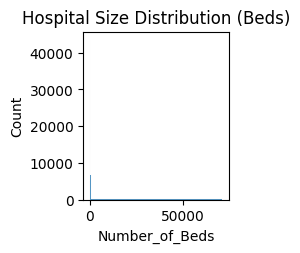

In [16]:
if 'Number_of_Beds' in df.columns:
    plt.subplot(2, 3, 1)
    bins = [0, 25, 50, 100, 200, 500, df['Number_of_Beds'].max()]
    sns.histplot(df['Number_of_Beds'], bins=bins, kde=False)
    plt.title('Hospital Size Distribution (Beds)')

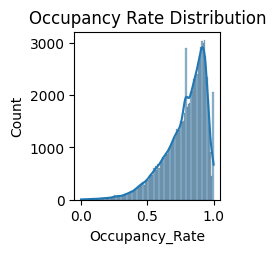

In [17]:
if 'Occupancy_Rate' in df.columns:
    plt.subplot(2, 3, 2)
    sns.histplot(df['Occupancy_Rate'], kde=True)
    plt.title('Occupancy Rate Distribution')

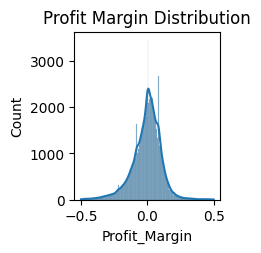

In [18]:
if 'Profit_Margin' in df.columns:
    plt.subplot(2, 3, 3)
    sns.histplot(df[df['Profit_Margin'].between(-0.5, 0.5)]['Profit_Margin'], kde=True)
    plt.title('Profit Margin Distribution')

Text(0.5, 1.0, 'Total Assets Distribution (Log Scale)')

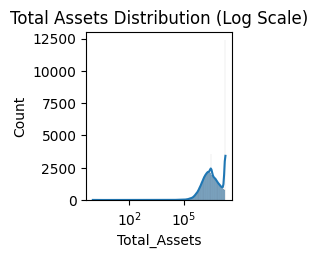

In [19]:
plt.subplot(2, 3, 4)
sns.histplot(df['Total_Assets'], kde=True, log_scale=True)
plt.title('Total Assets Distribution (Log Scale)')


Text(0.5, 1.0, 'Net Income Distribution')

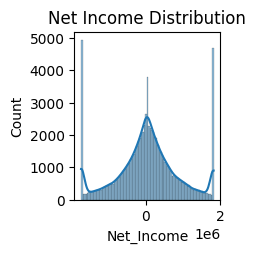

In [20]:
plt.subplot(2, 3, 5)
sns.histplot(df['Net_Income'], kde=True)
plt.title('Net Income Distribution')

Saved visualizations of cleaned data to 'cleaned_data_visualizations.png'

Data cleaning and EDA complete!


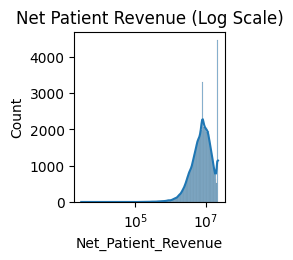

In [21]:
plt.subplot(2, 3, 6)
sns.histplot(df['Net_Patient_Revenue'], kde=True, log_scale=True)
plt.title('Net Patient Revenue (Log Scale)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('cleaned_data_visualizations.png')
print("Saved visualizations of cleaned data to 'cleaned_data_visualizations.png'")

print("\nData cleaning and EDA complete!")

In [31]:
if 'Asset_Size_Category' in df.columns and 'Profitability_Category' in df.columns:
    # Select key categorical variables
    cat_vars = ['Provider_CCN', 'Hospital_Size_Category', 'Asset_Size_Category',
               'Profitability_Category']
    cat_vars = [col for col in cat_vars if col in df.columns]

NameError: name 'log_message' is not defined

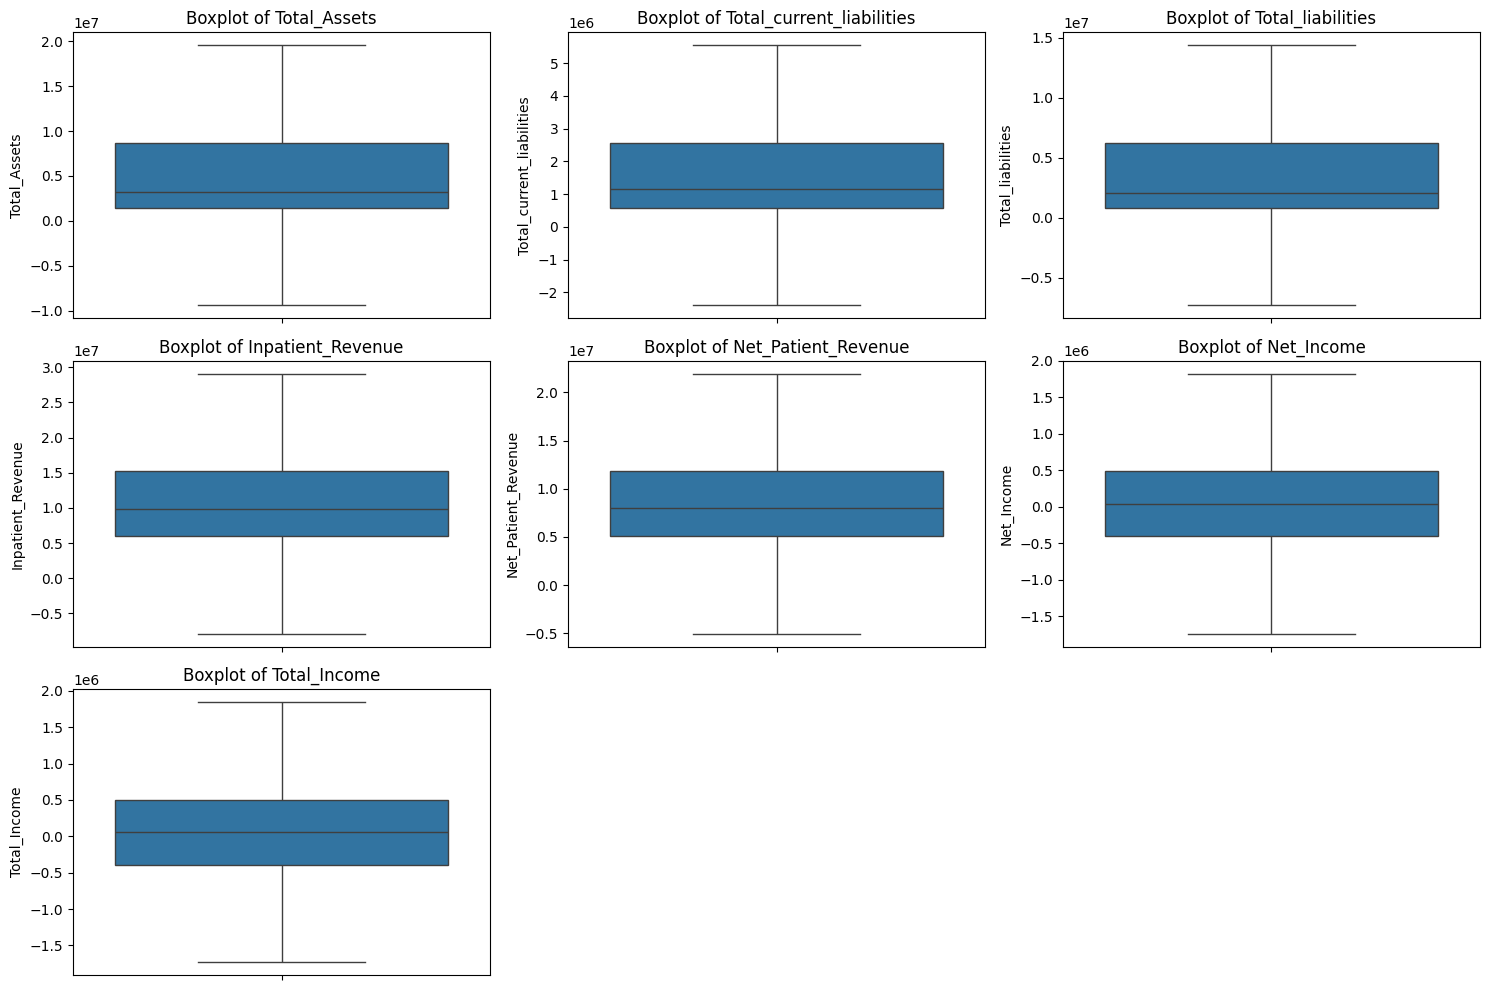

In [37]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(financial_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
log_message("Saved boxplots of financial columns to visualize outliers")

# Handle outliers using multiple methods
outlier_methods = {
    'IQR': 'IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR)',
    'Percentile': 'Percentile method (1st and 99th percentiles)',
    'Z-score': 'Z-score method (|z| > 3)'
}
